Compare NEMO 3.6 tidal curretns with NEMO 3.4

In [1]:
import datetime
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy.io as sio

from salishsea_tools import viz_tools
from salishsea_tools import ellipse
from nowcast import research_VENUS

import baroclinic as bc
%matplotlib inline

In [2]:
SITES=research_VENUS.SITES['VENUS']

# Tides

Now look at the tidal analysis for each case.

##  Surface 
### M2 major 

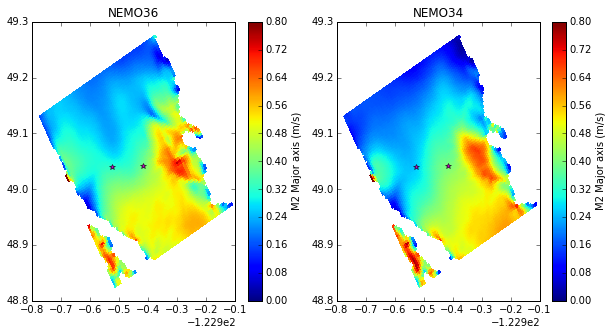

In [3]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/surface_tides.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/surface_tides.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    mesh=ax.pcolormesh(lons, lats, major, vmin=0,vmax=0.8)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('M2 Major axis (m/s)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
    #Axis limits
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.8,49.3])

## Baroclinic 
### M2 Major at Surface

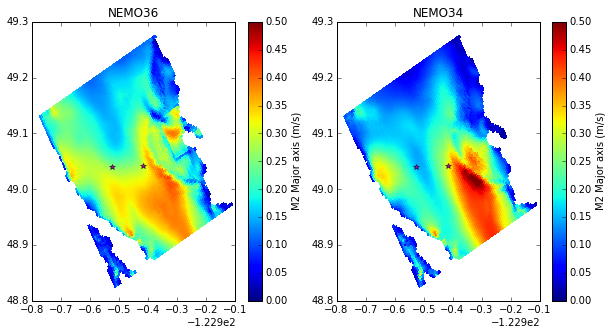

In [4]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    mesh=ax.pcolormesh(lons, lats, major[:,:,0], vmin=0,vmax=0.5)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('M2 Major axis (m/s)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
    #Axis limits
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.8,49.3])

## Barotropic
### M2

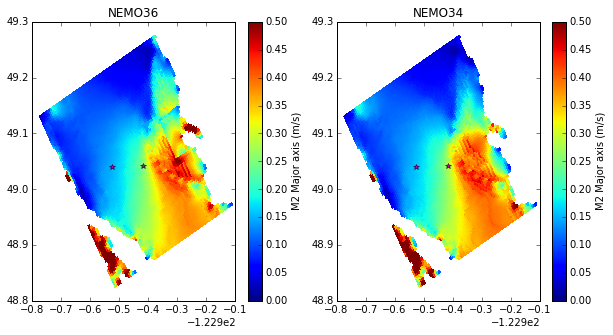

In [5]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/barotropic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/barotropic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    mesh=ax.pcolormesh(lons, lats, major, vmin=0,vmax=0.5)
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('M2 Major axis (m/s)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['lon'], SITES['Central']['lat'], 'm*', label='Central')
    ax.plot(SITES['East']['lon'], SITES['East']['lat'], 'm*',label = 'East')
    
    #Axis limits
    ax.set_xlim([-123.7,-123])
    ax.set_ylim([48.8,49.3])

## Barcolinic Beams

Calculate the baroclinic tidal kinetic energy. I will define this as

$KE = 0.5(major^2 +minor^2) $

for each grid point.

In [6]:
def baroclinic_ke(const, datastruc):
    """Calculate 0.5(major^2 + minor^2) for a constintuend in datastruc"""
    major, minor, phase, incli= bc.get_constituent(const ,datastruc)
    ke = 0.5*(major**2 +minor**2)
    return ke

### M2 Baroclinic KE at surface

In [7]:
#NEMO grid points of boottom left subdomain
i0=242
j0=382
i_hor= np.arange(0,lons.shape[1],dtype=int); j_hor=  40*np.ones(i_hor.shape, dtype=int)
j_ver = np.arange(0,lons.shape[0],dtype=int); i_ver = 40*np.ones(j_ver.shape, dtype=int)
j_dia = np.arange(0,30); i_dia = np.arange(30, 60)
j_dia2 = np.arange(0,80,2); i_dia2 = np.arange(50, 10,-1)

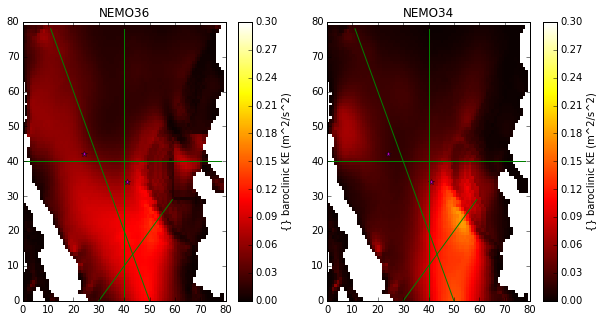

In [8]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    
    ke = baroclinic_ke(const ,datastruc)
    mesh=ax.pcolormesh( ke[:,:,0].T, vmin=0,vmax=0.3,cmap='hot')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} baroclinic KE (m^2/s^2)')
    
    ax.set_title(run)
    #Add bathymetry contours
    ax.plot(SITES['Central']['i']-i0, SITES['Central']['j']-j0, 'm*', label='Central')
    ax.plot(SITES['East']['i']-i0, SITES['East']['j']-j0, 'm*',label = 'East')
    
    #Axis limits
    #ax.set_xlim([-123.7,-123])
    #ax.set_ylim([48.8,49.3])
    
    ax.plot(i_hor, j_hor, 'g')
    ax.plot(i_ver,j_ver, 'g')
    ax.plot(i_dia,j_dia, 'g')
    ax.plot(i_dia2,j_dia2, 'g')

* Reduction in baroclinic surface signal over the sills.
* East surface slightly weaker, central slightly stronger in 3.6

Slice across Strait

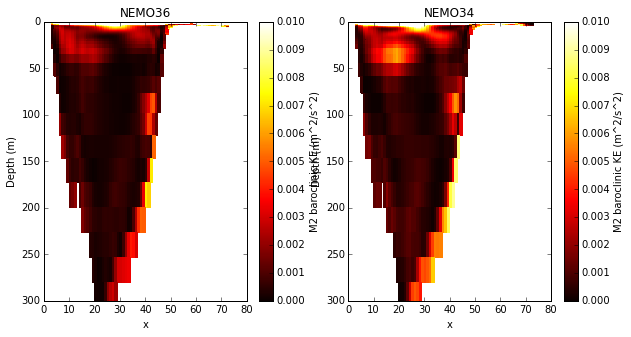

In [9]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    deps = datastruc['depth'][0,0]
    
    ke = baroclinic_ke(const ,datastruc)
    mesh=ax.pcolormesh(i_hor,deps, ke[i_hor,j_hor,:].T, vmin=0,vmax=0.01,cmap='hot')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} baroclinic KE (m^2/s^2)'.format(const))
    
    ax.set_title(run)
    ax.set_xlabel('x')

    ax.set_ylim([300,0])
    ax.set_ylabel('Depth (m)')


* Both models have a strong signal at 100m depth, just above the east node (x=40). I think we see this in the daily plots. Where is that from? Rich's current?
* Boundary current signal on right side is present in both. Stronger at depth in 3.4
* There seems to be some reflecting beams near the surface in both, but stronger in 3.4. Where are these coming from? 
* There is a strong signal at y=20 and deoth about 50m in 3.4. This is about where the Centrlal node is. It is weaker in 3.6. 

Slice along Strait

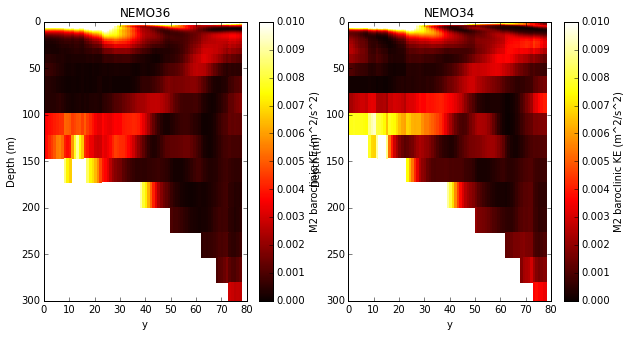

In [10]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    deps = datastruc['depth'][0,0]
    
    ke = baroclinic_ke(const ,datastruc)
    mesh=ax.pcolormesh(j_ver,deps, ke[i_ver,j_ver,:].T, vmin=0,vmax=0.01,cmap='hot')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} baroclinic KE (m^2/s^2)'.format(const))
    
    ax.set_title(run)
    ax.set_xlabel('y ')

    ax.set_ylim([300,0])
    ax.set_ylabel('Depth (m)')

* The slopes of the main beams look similar in 3.6/3.4 but it is hard to tell by eye.
* There are also some neat structures in the surface layer. It is interesteg that the beam doesn't extend all the way to the surface. 
* Depth of the surface layer seems shallower in 3.6 than 3.4. 
* The very strong surface signal for y<30 does not seem to be related to the beam.

In [11]:
#Approximate slope
150/((70-30)*500)

0.0075

Diangaonl slice

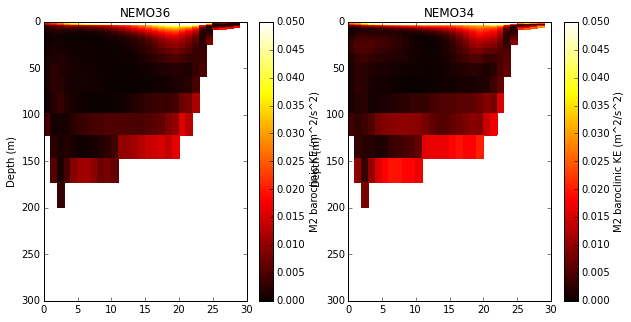

In [12]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    deps = datastruc['depth'][0,0]
    
    ke = baroclinic_ke(const ,datastruc)
    mesh=ax.pcolormesh(j_dia,deps, ke[i_dia,j_dia,:].T, vmin=0,vmax=0.05,cmap='hot')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} baroclinic KE (m^2/s^2)'.format(const))
    
    ax.set_title(run)

    ax.set_ylim([300,0])
    ax.set_ylabel('Depth (m)')

* Boundary currens on the river flats look weaker in 3.6

Diagonal slice 2

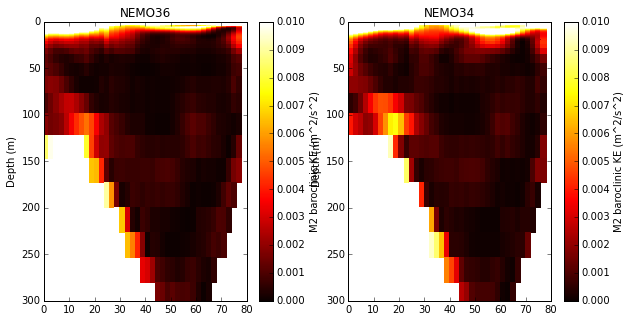

In [13]:
const='M2'
fig, axs = plt.subplots(1,2,figsize=((10,5)))
runs = {'NEMO34': '/data/nsoontie/MEOPAR/SalishSea/results/tides/bathymods/bathy2_nowinds/baroclinic_tides_masked.mat',
        'NEMO36':'/data/nsoontie/MEOPAR/SalishSea/results/tides/TS4/baroclinic_tides_masked.mat'}

for run, ax in zip(runs, axs):
    data =sio.loadmat(runs[run])
    datastruc = data['datastruc']
    lats = datastruc['lats'][0,0]
    lons = datastruc['lons'][0,0]
    deps = datastruc['depth'][0,0]
    
    ke = baroclinic_ke(const ,datastruc)
    mesh=ax.pcolormesh(j_dia2,deps, ke[i_dia2,j_dia2,:].T, vmin=0,vmax=0.01,cmap='hot')
    cbar = plt.colorbar(mesh, ax=ax)
    cbar.set_label('{} baroclinic KE (m^2/s^2)'.format(const))
    
    ax.set_title(run)

    ax.set_ylim([300,0])
    ax.set_ylabel('Depth (m)')